# Test De-Noising Model Implementation (to be deleted)

Since no DL image can be created now (noise need to be further analyzed), we try the denoising model with the real CT images.

## Model

In [1]:
import os
import torch
from utils import load_data

os.chdir("models")
from cnn_trainer import CnnTrainer
from cnn_viewer import CnnViewer

os.chdir("../")

%load_ext autoreload
%autoreload 2

## Data

Create a folder to be deleted to have png images to  test our model.

In [2]:
## ~1min45s to load all 42'487 images
#data_path = 'data'
#data = load_data(data_path)
#
#def save_images_to_folder(image_list, folder_path):
#    if not os.path.exists(folder_path):
#        os.makedirs(folder_path)
#
#    for i, image in enumerate(image_list):
#        image.save(os.path.join(folder_path, f"image_{i}.png"))
#
#
## Let's only look at one specific patient for computation reasons
#l506 = data.filter(cat=['train'],
#                   img_type=['3mm B30'],
#                   dose=['full', 'quarter'],
#                   patient=['L506'])
#
## Separate full and quarter dose image of patient L506 for one specific conditions
#l506_fd = l506.filter(dose=['full'])
#l506_qd = l506.filter(dose=['quarter'])
#
#pil_ct_images_te = [img.pil for img in l506_fd.imgs]
#pil_ct_images_tr = [img.pil for img in l506_qd.imgs]
#
#save_images_to_folder(pil_ct_images_tr, 'to_delete/train')
#save_images_to_folder(pil_ct_images_te, 'to_delete/test')

Define model parameters

Start Training Epoch 1/4...


Progress of training epoch 1: 85it [00:16,  5.05it/s]                        
Progress of validation metrics epoch 1: 100%|██████████| 21/21 [00:00<00:00, 49.42it/s]


- Average metrics: 
	- train loss=3.74e-02, train mse=3.74e-02, learning rate=0.0009487106797846494 
	- val loss=2.28e-02, val mse=2.28e-02 
Finish Training Epoch 1 !

Start Training Epoch 2/4...


Progress of training epoch 2: 85it [00:17,  4.90it/s]                        
Progress of validation metrics epoch 2: 100%|██████████| 21/21 [00:00<00:00, 50.05it/s]


- Average metrics: 
	- train loss=1.59e-02, train mse=1.59e-02, learning rate=0.0006811638640718845 
	- val loss=1.13e-02, val mse=1.13e-02 
Finish Training Epoch 2 !

Start Training Epoch 3/4...


Progress of training epoch 3: 85it [00:17,  4.97it/s]                        
Progress of validation metrics epoch 3: 100%|██████████| 21/21 [00:00<00:00, 58.84it/s]


- Average metrics: 
	- train loss=9.11e-03, train mse=9.11e-03, learning rate=0.000306300285938328 
	- val loss=7.91e-03, val mse=7.91e-03 
Finish Training Epoch 3 !

Start Training Epoch 4/4...


Progress of training epoch 4: 85it [00:17,  4.86it/s]                        
Progress of validation metrics epoch 4: 100%|██████████| 21/21 [00:00<00:00, 61.42it/s]


- Average metrics: 
	- train loss=7.45e-03, train mse=7.45e-03, learning rate=4.6179381800086134e-05 
	- val loss=7.45e-03, val mse=7.45e-03 
Finish Training Epoch 4 !


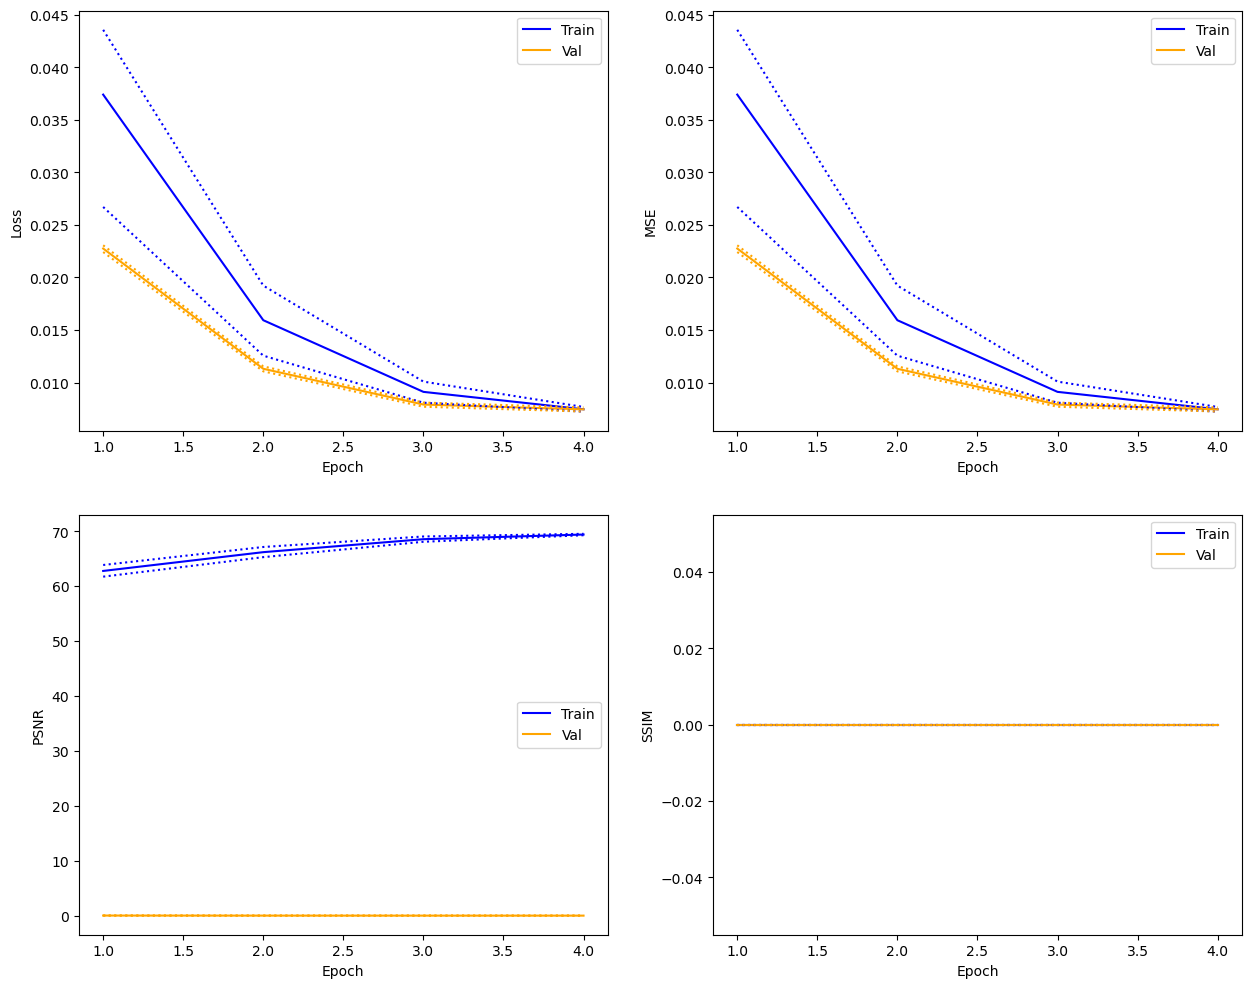

In [3]:
data_kwargs = dict(
    batch_size=2,
    images_folder_path='to_delete/train',
    target_folder_path='to_delete/test'
)

optimizer_kwargs = dict(
    lr=1e-3,
    weight_decay=1e-2
)

cnn = CnnTrainer(
    model_name='DnCNN',
    data_kwargs=data_kwargs,
    num_epochs=4,
    device='cpu',
    optimizer_kwargs=optimizer_kwargs,
    model_saving_path=None,
    val_size=0.2
)

cnn.fit(plot=True)